In [28]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

### Determine if you deal with nifti1 or nifti2 given a .nii file.
(see https://discourse.itk.org/t/nifti-1-or-nifti-2-data-format/4330)

In [2]:
file_name = './datasets/aal/atlas/AAL2.nii'
nii1_sizeof_hdr = 348
nii2_sizeof_hdr = 540

with open(file_name, 'rb') as fp:
    byte_data = fp.read(4)
    sizeof_hdr = int.from_bytes(byte_data, byteorder='little')
    if sizeof_hdr == nii1_sizeof_hdr:
        print('nifti1')
    elif sizeof_hdr == nii2_sizeof_hdr:
        print('nifti2')
    else: #big endian
        sizeof_hdr = int.from_bytes(byte_data, byteorder='big')
        if sizeof_hdr == nii1_sizeof_hdr:
            print('nifti1')
        elif sizeof_hdr == nii2_sizeof_hdr:
            print('nifti2')

nifti1


Now I saw, that this is actually displayed in the finder too.

### Read the aal2-atlas and extract some info
(see https://nipy.org/nibabel/gettingstarted.html)

In [5]:
img = nib.load(file_name)

In [6]:
img.shape

(91, 109, 91)

In [7]:
img.get_data_dtype()

dtype('>i2')

In [40]:
print(img.affine.shape)
print(img.affine)

(4, 4)
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


In [9]:
data = img.get_fdata()
data.shape

(91, 109, 91)

In [39]:
hdr = img.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0. 90.]

In [11]:
hdr.get_xyzt_units()

('mm', 'sec')

In [27]:
np.max(data)

9170.0

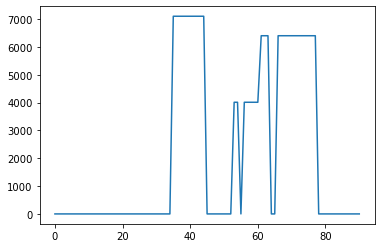

In [38]:
# plt.plot(np.ndarray.flatten(data))

plt.plot(data[50, 50, :])


### what is stored in the aal2.nii.gz-directory?

### what is stored in the aal2.nii.lut-file?

In [17]:
img2 = nib.load("./datasets/aal/aal2.nii.gz")

In [18]:
img3 = nib.load("./datasets/aal/ROI_MNI_V5.nii")

In [19]:
img2.shape

(91, 109, 91)

# ...

Text(0.5, 0.98, 'Center slices for EPI image')

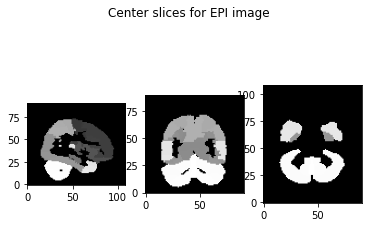

In [41]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = data[26, :, :]
slice_1 = data[:, 30, :]
slice_2 = data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

### Access the coordinates of the source space

In [42]:
import os.path as op
import mne
from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
sample_dir = op.join(data_path, 'MEG', 'sample',)
raw_fname = op.join(sample_dir, 'sample_audvis_raw.fif')
# The paths to Freesurfer reconstructions
subjects_dir = op.join(data_path, 'subjects')
subject = 'sample'

In [43]:
src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch',
                             subjects_dir=subjects_dir)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/martin/mne_data/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/155407 selected to source space (oct = 4)

Loading /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/martin/mne_data/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 258/156866 selected to so

In [44]:
src.info

{'working_dir': '/Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project',
 'command_line': 'setup_source_space(sample, spacing=oct4, surface=white, subjects_dir=/Users/martin/mne_data/MNE-sample-data/subjects, add_dist=patch, verbose=None)'}

In [47]:
# shows fancy 3D visualization
src.plot(subjects_dir=subjects_dir)

Using pyvistaqt 3d backend.



In [49]:
src.export_volume("source_space_sample_subject.nii",
                  dest="surf",
                  mri_resolution= "sparse")    # dest="surf" for coordinate space of the FreeSurfer surface (Surface RAS)
                                            # mri_resolution:
                                            #
                                            # use_lut : https://surfer.nmr.mgh.harvard.edu/fswiki/LabelsClutsAnnotationFiles

Reading FreeSurfer lookup table


ValueError: Source spaces must contain at least one volume.